# Chapter 2 Hydrology: Confined vs Unconfined Aquifers

1. [Introduction](#1.-Introduction)
2. [Simulation](#2.-Simulation)
3. [Self-Assessment](#3.-Self-Assessment)

## 1. Introduction

### Groundwater Hydrology: Confined vs. Unconfined Aquifers

Understanding the behavior of confined and unconfined aquifers is essential for groundwater modeling, well design, and aquifer testing. These two aquifer types differ in their physical structure, pressure conditions, and response to pumping [@chow1988applied].

---


### ✅ Confined Aquifer
- Bounded above and below by **impermeable layers** (aquitards)
- Water is under **pressure** greater than atmospheric
- When tapped by a well, water may rise above the top of the aquifer (artesian condition)

### ✅ Unconfined Aquifer
- Upper boundary is the **water table**
- Water is at **atmospheric pressure**
- Saturated thickness varies with recharge and pumping

---

### Governing Equations

### 1. **Confined Aquifer (Theis Solution)**

$$
s(r, t) = \frac{Q}{4\pi T} \cdot W(u)
\quad \text{where} \quad
u = \frac{r^2 S}{4 T t}
$$

- $( s $) = drawdown (m)  
- $( Q $) = pumping rate (m³/day)  
- $( T $) = transmissivity (m²/day)  
- $( S $) = storativity (dimensionless)  
- $( r $) = radial distance from well (m)  
- $( t $) = time since pumping began (days)  
- $( W(u) $) = exponential integral function

---

### 2. **Unconfined Aquifer (Dupuit Approximation)**

$$
h(r)^2 = h_0^2 - \frac{Q}{\pi T} \ln\left(\frac{r}{r_w}\right)
\quad \Rightarrow \quad
s(r) = h_0 - h(r)
$$

- $( h_0 $) = initial water table elevation (m)  
- $( h(r) $) = water table elevation at distance \( r \)  
- $( r_w $) = well radius (m)  
- $( s(r) $) = drawdown (m)

---

### Key Parameters

| Parameter        | Description                                      |
|------------------|--------------------------------------------------|
| `Transmissivity (T)` | Ability of aquifer to transmit water (m²/day) |
| `Storativity (S)`     | Volume of water released per unit area per unit decline in head (dimensionless) |
| `Hydraulic Conductivity (K)` | Rate at which water moves through porous media (m/day) |
| `Drawdown (s)`         | Decline in hydraulic head due to pumping (m) |
| `Radius of Influence`  | Distance from well affected by pumping (m) |

---

### Conceptual Differences

| Feature              | Confined Aquifer             | Unconfined Aquifer           |
|----------------------|------------------------------|------------------------------|
| Upper boundary       | Impermeable layer            | Water table                  |
| Pressure condition   | Greater than atmospheric     | Atmospheric                  |
| Response to pumping  | Instantaneous pressure drop  | Delayed due to drainage      |
| Storativity          | Typically \(10^{-5}\) to \(10^{-3}\) | Typically \(> 0.01\)        |
| Saturated thickness  | Constant                     | Variable                     |

---

### Applications

- **Confined aquifers**: Municipal water supply, artesian wells, regional aquifer systems  
- **Unconfined aquifers**: Shallow wells, irrigation, recharge studies  
- Used in **pumping tests**, **aquifer modeling**, **contaminant transport**, and **groundwater management**

---

### References

<!-- - Fetter, C.W. (2001). *Applied Hydrogeology*  
- Domenico & Schwartz (1998). *Physical and Chemical Hydrogeology*  
- Theis, C.V. (1935). *The relation between the lowering of the piezometric surface and the rate and duration of discharge of a well using groundwater storage* -->


```{bibliography}
:style: apa
:filter: true
```

In [5]:
# 📌 Run this cell in a Jupyter Notebook
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# 📐 Groundwater drawdown model
def groundwater_model(aquifer_type, transmissivity, storativity, radius_well, radius_influence, pumping_rate):
    clear_output(wait=True)

    r = np.linspace(radius_well, radius_influence, 200)

    if aquifer_type == 'Confined':
        # Theis steady-state approximation
        drawdown = (pumping_rate / (2 * np.pi * transmissivity)) * np.log(radius_influence / r)
        discharge = pumping_rate
        head = -drawdown  # invert for plotting
    elif aquifer_type == 'Unconfined':
        # Dupuit approximation
        h0 = np.sqrt((pumping_rate / (np.pi * transmissivity)) * np.log(radius_influence / radius_well))
        h = np.sqrt(h0**2 - (pumping_rate / (np.pi * transmissivity)) * np.log(r / radius_well))
        drawdown = h0 - h
        discharge = pumping_rate
        head = h  # actual water table elevation
    else:
        raise ValueError("Unknown aquifer type")

    # Plot cone of depression
    plt.figure(figsize=(8, 5))
    plt.plot(r, head, color='teal', label='Water Table Elevation (m)')
    plt.xlabel('Radial Distance from Well (m)')
    plt.ylabel('Elevation (m)')
    plt.title(f'Cone of Depression ({aquifer_type} Aquifer)')
    plt.gca().invert_yaxis()  # invert y-axis to show depression
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Display results
    print(f"🧭 Aquifer Type: {aquifer_type}")
    print(f"🕳️ Well Radius: {radius_well:.2f} m")
    print(f"📏 Radius of Influence: {radius_influence:.2f} m")
    print(f"💧 Transmissivity: {transmissivity:.2f} m²/day")
    print(f"🧪 Storativity: {storativity:.4f}")
    print(f"🚰 Pumping Rate: {pumping_rate:.2f} m³/day")
    print(f"🌊 Estimated Discharge: {discharge:.2f} m³/day")

# 🎚️ Interactive controls
aquifer_dropdown = widgets.Dropdown(
    options=['Confined', 'Unconfined'],
    value='Confined',
    description='Aquifer Type'
)
transmissivity_slider = widgets.FloatSlider(value=500.0, min=10.0, max=2000.0, step=10.0, description='Transmissivity (m²/day)')
storativity_slider = widgets.FloatSlider(value=0.001, min=0.0001, max=0.3, step=0.0005, description='Storativity')
radius_well_slider = widgets.FloatSlider(value=0.2, min=0.05, max=1.0, step=0.05, description='Well Radius (m)')
radius_influence_slider = widgets.FloatSlider(value=300.0, min=50.0, max=1000.0, step=50.0, description='Radius of Influence (m)')
pumping_rate_slider = widgets.FloatSlider(value=1000.0, min=100.0, max=5000.0, step=100.0, description='Pump Rate (m³/day)')

interactive_plot = widgets.interactive(
    groundwater_model,
    aquifer_type=aquifer_dropdown,
    transmissivity=transmissivity_slider,
    storativity=storativity_slider,
    radius_well=radius_well_slider,
    radius_influence=radius_influence_slider,
    pumping_rate=pumping_rate_slider
)

display(interactive_plot)

interactive(children=(Dropdown(description='Aquifer Type', options=('Confined', 'Unconfined'), value='Confined…

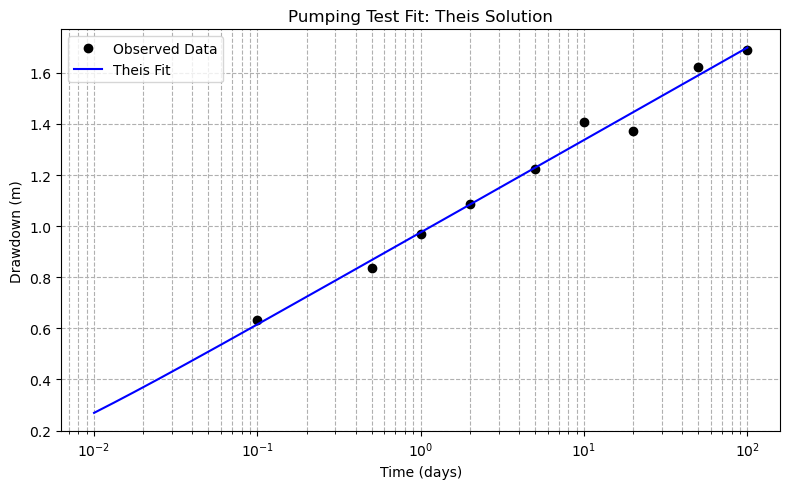

📍 Estimated Transmissivity (T): 506.72 m²/day
📍 Estimated Storativity (S): 0.00091


In [4]:
# 📌 Run this cell in a Jupyter Notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import exp1

# 📐 Theis drawdown model
def theis_model(t, T, S, Q, r):
    u = (r**2 * S) / (4 * T * t)
    s = (Q / (4 * np.pi * T)) * exp1(u)
    return s

# 📊 Synthetic or observed data (replace with real measurements)
# Example: drawdown at 50 m from well, Q = 1000 m³/day
Q = 1000.0  # pumping rate (m³/day)
r = 50.0    # distance to observation well (m)

# Simulated time and drawdown data (replace with field data)
t_data = np.array([0.1, 0.5, 1, 2, 5, 10, 20, 50, 100])  # days
true_T = 500.0
true_S = 0.001
s_data = theis_model(t_data, true_T, true_S, Q, r)
s_data += np.random.normal(0, 0.05, size=s_data.shape)  # add noise

# 📐 Curve fitting to estimate T and S
def fit_theis(t, T, S):
    return theis_model(t, T, S, Q, r)

popt, pcov = curve_fit(fit_theis, t_data, s_data, bounds=([10, 1e-5], [5000, 0.1]))
estimated_T, estimated_S = popt

# 📈 Plot results
t_fit = np.logspace(-2, 2, 200)
s_fit = fit_theis(t_fit, estimated_T, estimated_S)

plt.figure(figsize=(8, 5))
plt.semilogx(t_data, s_data, 'o', label='Observed Data', color='black')
plt.semilogx(t_fit, s_fit, '-', label='Theis Fit', color='blue')
plt.xlabel('Time (days)')
plt.ylabel('Drawdown (m)')
plt.title('Pumping Test Fit: Theis Solution')
plt.grid(True, which='both', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

# 📋 Report estimated parameters
print(f"📍 Estimated Transmissivity (T): {estimated_T:.2f} m²/day")
print(f"📍 Estimated Storativity (S): {estimated_S:.5f}")

## 3. Self-Assessment

### Groundwater Drawdown & Cone of Depression: Quiz, Conceptual & Reflective Questions

This module supports understanding of groundwater drawdown modeling using analytical solutions for **confined** and **unconfined aquifers**. It visualizes the cone of depression and explores how aquifer properties affect pumping response.

---

### Conceptual Questions

1. **What does transmissivity represent in aquifer modeling?**
   - A. The rate of infiltration from surface  
   - B. The ability of the aquifer to transmit water horizontally  
   - C. The total volume of water stored in the aquifer  
   - D. The vertical permeability of the aquifer  

2. **In a confined aquifer, drawdown is calculated using:**
   - A. Darcy’s law  
   - B. Dupuit approximation  
   - C. Theis equation (steady-state form)  
   - D. Ghyben-Herzberg relation  

3. **In an unconfined aquifer, the water table elevation is modeled as:**
   - A. A linear decline from the well  
   - B. A parabolic surface using Dupuit’s assumption  
   - C. A constant head boundary  
   - D. A vertical recharge zone  

4. **What does storativity represent in confined aquifers?**
   - A. The volume of water released per unit decline in head  
   - B. The rate of recharge from rainfall  
   - C. The thickness of the aquifer  
   - D. The hydraulic conductivity  

---

### Code Interpretation Prompts

1. Why is `np.log(radius_influence / r)` used in the confined aquifer drawdown formula?  
2. What does the inverted y-axis in the plot represent physically?  
3. How does increasing transmissivity affect the shape of the cone of depression?  
4. Why is the square root used in the unconfined aquifer calculation?  
5. How would you modify the model to include time-dependent drawdown or recovery?

---

### Reflection Questions

1. **How do aquifer type and transmissivity influence well performance and sustainability?**  
2. **Why is it important to visualize the cone of depression when designing well fields?**  
3. **What are the limitations of using analytical solutions like Theis and Dupuit in heterogeneous aquifers?**  
4. **How could this model be extended to simulate multiple wells or interference effects?**  
5. **What insights can be gained by interactively adjusting pumping rate, radius of influence, and aquifer type?**

---

### Hydrogeologic Insight

> “Understanding drawdown behavior is essential for sustainable groundwater management. Analytical models like Theis and Dupuit provide powerful tools for estimating aquifer response and designing efficient well systems.”

---